# Capstone 2 Exploratory Data Analysis

## Table of Contents<a id='Table_of_Contents'></a>
* [2 Exploratory Data Analysis](#Exploratory_Data_Analysis)
    * [2.1 Imports](#Imports)
        * [2.1.1 Import Libraries](#Import_Libraries)
        * [2.1.2 Import Data](#Import_Data)          
    
    * [2.2 Visualizing Churn Across Features](#Visualizing_Churn_Across_Features)
        * [2.2.1 Categorical Features](#Categorical_Features)
        * [2.2.2 Numerical Features](#Numerical_Features)
        * [2.2.3 Boolean Features](#Boolean_Features)
    
    * [2.3 Exploring Feature Relationships](#Exploring_Feature_Relationships)
    

## 1.1 Imports<a id='Imports'></a>

### 1.1.1 Import Libraries<a id='Import_Libraries'></a>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

### 1.1.2 Import Data<a id='Import_Data'></a>

In [18]:
data = pd.read_csv("../data/processed/combined.csv")

In [19]:
data = data.drop("Unnamed: 0", axis=1)

In [21]:
data.shape

(599990, 23)

In [82]:
data.head()

,msno,transaction_date,is_churn,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,membership_expire_date,is_cancel,...,registered_via,registration_init_time,total_days,total_num_25,total_num_50,total_num_75,total_num_985,total_num_100,total_num_unique,total_secs
0,++6xEqu4JANaRY4GjEfEFtLtqOvZvYPyP3uk/PW9Ces=,20170331,0,41,30,99,99,1,20170430,0,...,7,20160501,9,18,3,0,2,38,53,9541.349
1,++95tJZADNg8U8HKbYdxbbXIRsO6pw1zBK4tHI7BtZo=,20170331,0,39,30,149,149,1,20170524,0,...,3,20120603,21,62,15,5,7,205,172,57832.941
2,++A8p4GrsTnMjI6hAZEtlRsaz6s6O9ddUoH0fmS4s7s=,20170326,0,30,30,149,149,1,20170426,0,...,9,20141118,28,46,13,12,14,395,437,104319.610
3,++EcAZQCSSJQMx37/+/QqjiVQq3cS/hGug6JlzCufig=,20170331,0,39,30,149,149,1,20170518,0,...,9,20110205,25,77,35,29,17,440,339,115120.269
4,++Ve6PtJ8HDzBYbkuwGkmNrXdOk7ZLfTATtE6G/mX/U=,20170331,0,34,30,149,149,1,20170430,0,...,9,20080323,4,64,9,10,5,58,137,20449.617


## 1.2 Visualizing Churn Across Features<a id="Visualizing_Churn_Across_Features"></a>

### 1.2.1 Categorical Features<a id="Categorical_Features"></a>

Let's explore the percentage of subscribers that churn for each value in the categorical features. 

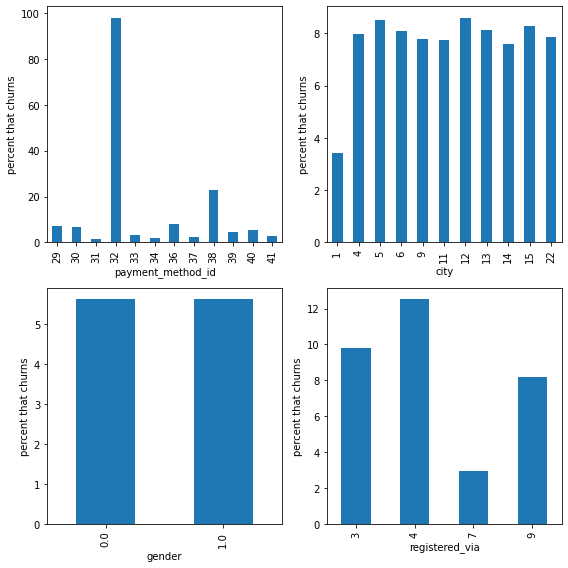

In [78]:
cat_features = ["payment_method_id", "city", "gender", "registered_via"]
fig, axs = plt.subplots(2, 2, figsize=(8,8))
axs = axs.flatten()
for i, feature in enumerate(cat_features): 
    churn_pct_by_feature = (data.groupby(by=feature).is_churn.sum() / data[feature].value_counts())*100
    churn_pct_by_feature.plot(kind="bar", ax=axs[i], xlabel=feature, ylabel="percent that churns")

plt.tight_layout()
plt.show();

Insights:
* Almost 100% of the subscribers who payed with payment method id 32 churned
* Subscribers from city 1 (which is also the most populous) are the least likely to churn
* There is no correlation between gender and likelyhood of churning
* Registration method 7 is the best at retaining subscribers - less than 4% of the subscribers who registered with method 7 churned, while over 8% of subscribers churned with the other methods 

### 1.2.2 Numerical Features<a id="Numerical_Features"></a>

Are subscribers who spend more time on the app more likely to renew or churn? 

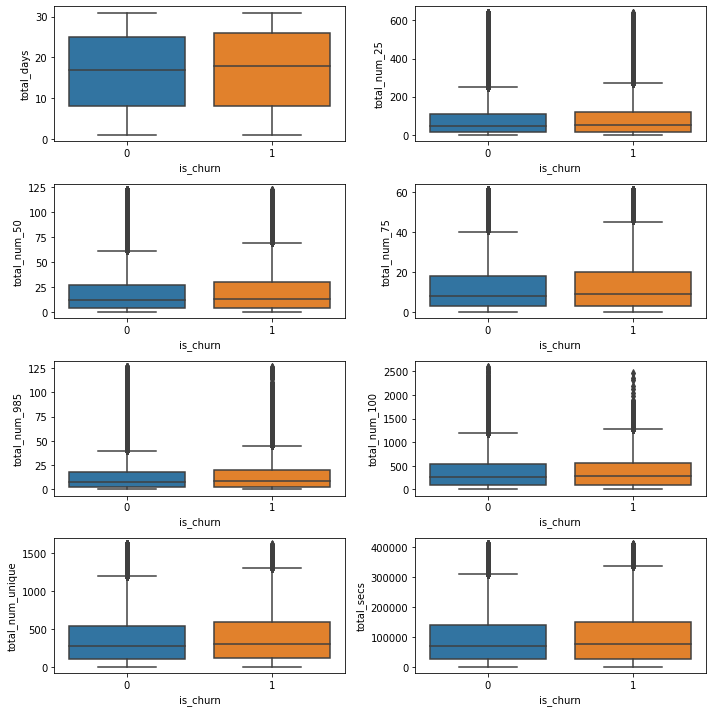

In [94]:
num_features = ["total_days", "total_num_25", "total_num_50", "total_num_75", 
                "total_num_985", "total_num_100", "total_num_unique", "total_secs"]

fig, axs = plt.subplots(4, 2, figsize=(10,10))
axs = axs.flatten()
for i, feature in enumerate(num_features): 
    sns.boxplot(x="is_churn", y=feature, data=data, ax=axs[i])

plt.tight_layout()
plt.show();

Insights:

Listening behavior has very little to do with whether or not a subscriber churns. Subscribers that churn and subscribers that renew use the service at the same rates. 

## 2.3 Exploring Feature Relationships<a id="Exploring_Feature_Relationships"></a>

Are customers who sign up for auto-renew more or less likely to churn? Does plan price and amount paid affect that decision? 

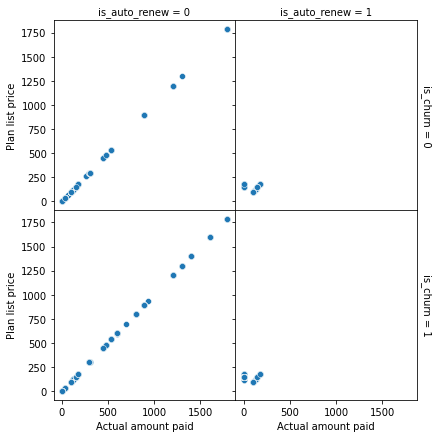

In [96]:
g = sns.FacetGrid(data=data, col="is_auto_renew", row="is_churn", margin_titles=True, despine=False)
g.map_dataframe(sns.scatterplot, x="actual_amount_paid", y="plan_list_price")
g.set_axis_labels("Actual amount paid", "Plan list price")
g.fig.subplots_adjust(wspace=0, hspace=0);

Insights:   

* Top left: Subscribers who did not auto-renew and did not churn 
* Top right: Subscribers who did auto-renew and did not churn
* Bottom left: Subscribers who did not auto-renew and churned 
* Bottom right: Subscribers who did auto-renew bit still churned 


There appears to have been a promotion where subscribers who signed up for auto-renew got a discount. Was this promotion effective? Let's get the exact numbers of subscribers who got a discount, and count how many churned.

In [98]:
discount = data[data.actual_amount_paid < data.plan_list_price]
discount.shape

(634, 23)

In [83]:
data.columns

Index(['msno', 'transaction_date', 'is_churn', 'payment_method_id',
       'payment_plan_days', 'plan_list_price', 'actual_amount_paid',
       'is_auto_renew', 'membership_expire_date', 'is_cancel', 'city', 'age',
       'gender', 'registered_via', 'registration_init_time', 'total_days',
       'total_num_25', 'total_num_50', 'total_num_75', 'total_num_985',
       'total_num_100', 'total_num_unique', 'total_secs'],
      dtype='object')